<a href="https://colab.research.google.com/github/mohaktiwari/Machine-Learning-Projects/blob/main/CatsvsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 45.6MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout
import pandas as pd

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_ds = train_datagen.flow_from_directory(
        '/content/train',  # This is the source directory for training images
        target_size=(256,256),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
test_ds = validation_datagen.flow_from_directory(
        '/content/test',  # This is the source directory for validation images
        target_size=(256,256),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_ds,
      epochs=10,
      verbose=1,
      validation_data = test_ds)

Epoch 1/10
157/157 [==============================] - 370s 2s/step - loss: 1.7332 - accuracy: 0.5486 - val_loss: 1.1844 - val_accuracy: 0.4934
Epoch 2/10
157/157 [==============================] - 354s 2s/step - loss: 0.6961 - accuracy: 0.5980 - val_loss: 0.7074 - val_accuracy: 0.5736
Epoch 3/10
157/157 [==============================] - 358s 2s/step - loss: 0.6487 - accuracy: 0.6367 - val_loss: 0.6712 - val_accuracy: 0.5702
Epoch 4/10
157/157 [==============================] - 370s 2s/step - loss: 0.6135 - accuracy: 0.6655 - val_loss: 0.5814 - val_accuracy: 0.6930
Epoch 5/10
157/157 [==============================] - 363s 2s/step - loss: 0.5859 - accuracy: 0.6901 - val_loss: 0.5375 - val_accuracy: 0.7344
Epoch 6/10
157/157 [==============================] - 356s 2s/step - loss: 0.5727 - accuracy: 0.7046 - val_loss: 0.6428 - val_accuracy: 0.6260
Epoch 7/10
157/157 [==============================] - 356s 2s/step - loss: 0.5559 - accuracy: 0.7168 - val_loss: 0.5144 - val_accuracy: 0.7498

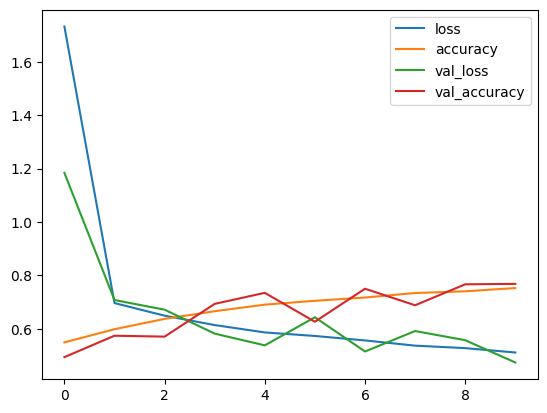

In [ ]:
losses=pd.DataFrame(model.history.history).plot()

In [ ]:
model.evaluate(test_ds)

157/157 [==============================] - 12s 78ms/step - loss: 0.4733 - accuracy: 0.7680


[0.4732668399810791, 0.7680000066757202]

In [ ]:
import cv2
import matplotlib.pyplot as plt

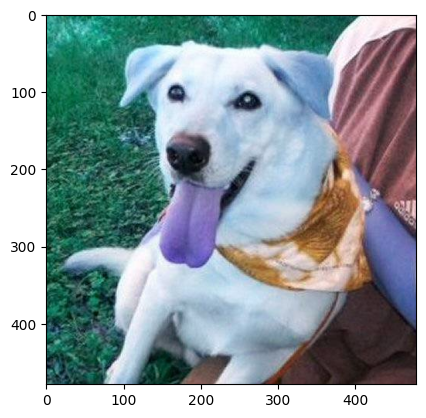

In [ ]:
img=cv2.imread('/content/train/dogs/dog.10260.jpg')
plt.imshow(img)

In [ ]:
img.shape

(479, 480, 3)

In [ ]:
img=cv2.resize(img,(256,256))

In [ ]:
img_input=img.reshape(1,256,256,3)

In [ ]:
model.predict(img_input)

1/1 [==============================] - 0s 17ms/step


array([[0.99999964]], dtype=float32)